In [54]:
import cv2
import dlib
import matplotlib.pyplot as plt
import time

# OpenCV 人臉分類器

1. 以array的格式儲存
2. 儲存四個值，分別為人臉位置的左上角x, y座標與寬高w, h

time:0.588


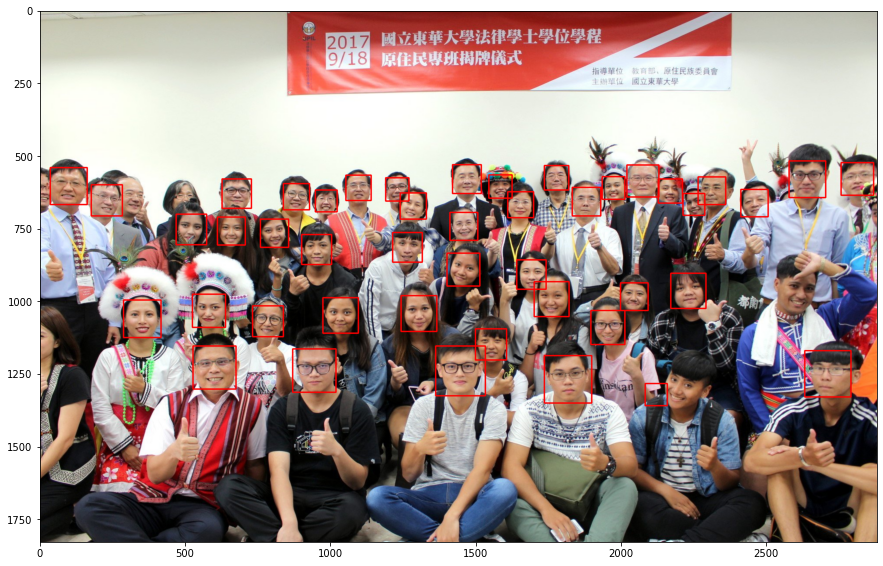

In [58]:
img = cv2.imread("Face_test.jpg")
img = cv2.resize(img, None, fx=1.5, fy=1.5)

cv_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')

start = time.time()
cv_faces = cv_detector.detectMultiScale(img,scaleFactor=1.2,minNeighbors=3,minSize=(15, 15),flags = cv2.CASCADE_SCALE_IMAGE)
end = time.time()
print("time:%0.3f" %(end - start))

for i in range(len(cv_faces)):
    x = cv_faces[i][0]
    y = cv_faces[i][1]
    w = cv_faces[i][2]
    h = cv_faces[i][3]

    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)

plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
VIDEO_IN = cv2.VideoCapture(0)
while True:
    hasFrame, img = VIDEO_IN.read()
    img = cv2.resize(img, None, fx=0.6, fy=0.6)
    cv_faces = cv_detector.detectMultiScale(img,scaleFactor=1.2,minNeighbors=3,minSize=(15, 15),flags = cv2.CASCADE_SCALE_IMAGE)

    for i in range(len(cv_faces)):
        x = cv_faces[i][0]
        y = cv_faces[i][1]
        w = cv_faces[i][2]
        h = cv_faces[i][3]

    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    cv2.imshow("Frame", img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
VIDEO_IN.release()
cv2.destroyAllWindows()

# Dlib
1. 以dlib中的rectangle的格式儲存，讀取方式較不同，需要注意
2. 儲存四個值，分別為人臉位置的左上角座標x1, y1與右下角座標x2, y2
* 根據dlib.rectangle類的定義：
`__init__(self: dlib.rectangle, left: int, top: int, right: int, bottom: int)`


time:0.579


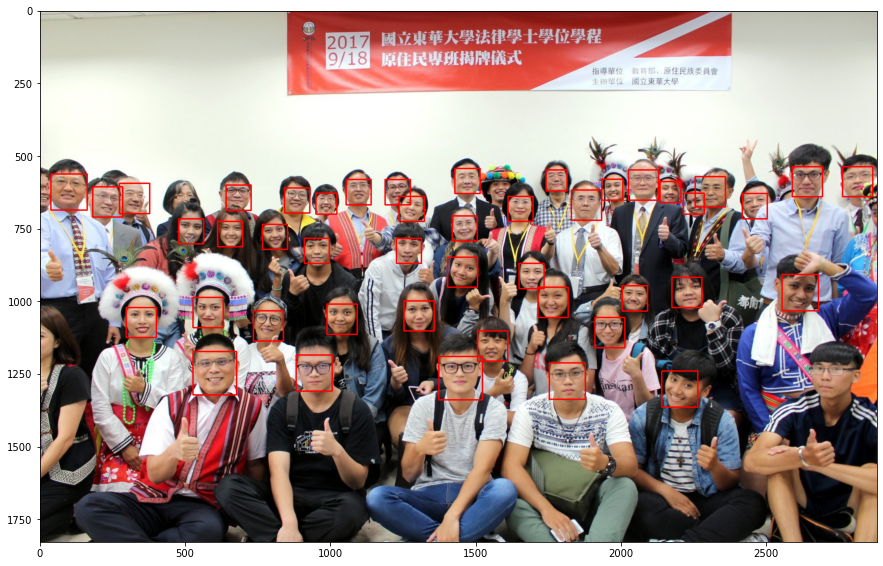

In [59]:
img = cv2.imread("Face_test.jpg")
img = cv2.resize(img, None, fx=1.5, fy=1.5)
dlib_detector = dlib.get_frontal_face_detector()

start = time.time()
dlib_faces = dlib_detector(img)
end = time.time()
print("time:%0.3f" %(end - start))

for i in range(len(dlib_faces)):
    x1 = dlib_faces[i].left()
    y1 = dlib_faces[i].top()
    x2 = dlib_faces[i].right()
    y2 = dlib_faces[i].bottom()

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 4)

plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
VIDEO_IN = cv2.VideoCapture(0)
while True:
    hasFrame, img = VIDEO_IN.read()
    img = cv2.resize(img, None, fx=0.6, fy=0.6)
    dlib_faces = dlib_detector(img)
    
    for i in range(len(dlib_faces)):
        x1 = dlib_faces[i].left()
        y1 = dlib_faces[i].top()
        x2 = dlib_faces[i].right()
        y2 = dlib_faces[i].bottom()

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 4)
    cv2.imshow("Frame", img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
VIDEO_IN.release()
cv2.destroyAllWindows()